In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# IEEE publication style settings
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 9,
    'legend.title_fontsize': 10,
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'figure.figsize': (7, 4),  # IEEE double-column width
    'axes.linewidth': 0.8,
    'grid.linewidth': 0.5,
    'lines.linewidth': 2,
    'lines.markersize': 7
})

# Consistent color mapping for models
model_colors = {
    'From Scratch': '#1f77b4',  # blue
    'CL': '#ff7f0e',  # orange
    'MCL': '#2ca02c',  # green
    'MAE + CL': '#d62728',  # red
    'MAE + MCL': '#9467bd'  # purple
}

# Line styles and markers for each model
model_styles = {
    'From Scratch': {'linestyle': '-', 'marker': 'o'},
    'CL': {'linestyle': '--', 'marker': 's'},
    'MCL': {'linestyle': '-.', 'marker': '^'},
    'MAE + CL': {'linestyle': ':', 'marker': 'D'},
    'MAE + MCL': {'linestyle': '-', 'marker': 'v'}
}

# Desired model order for plotting
model_order = ['From Scratch', 'CL', 'MCL', 'MAE + CL', 'MAE + MCL']

In [ ]:
# Organize data by model and percentage
# TODO: Add your 25% and 50% results when available
data = {
    'From Scratch': {
        100: 0.41875,
        75: 0.43386,
        50: 0.39913,
        25: 0.39177
    },
    'CL': {
        100: 0.46784,
        75: 0.46482,
        50: 0.45521,
        25: 0.43769
    },
    'MCL': {
        100: 0.4693,
        75: 0.45715,
        50: 0.48916,
        25: 0.442
    },
    'MAE + CL': {
        100: 0.4936,
        75: 0.48715,
        50: 0.46427,
        25: 0.45302
    },
    'MAE + MCL': {
        100: 0.4782,
        75: 0.48931,
        50: 0.45762,  # Add your result here
        25: 0.45638   # Add your result here
    }
}

# Convert to DataFrame for easier plotting
rows = []
for model, percentages in data.items():
    for pct, dice in percentages.items():
        if dice is not None:
            rows.append({'Model': model, 'Data %': pct, 'Dice Score': dice})

df = pd.DataFrame(rows)
print(df)

           Model  Data %  Dice Score
0   From Scratch     100     0.41875
1   From Scratch      75     0.43386
2   From Scratch      50     0.39913
3             CL     100     0.46784
4             CL      75     0.46482
5             CL      50     0.45521
6            MCL     100     0.46930
7            MCL      75     0.45715
8            MCL      50     0.48916
9       MAE + CL     100     0.49360
10      MAE + CL      75     0.48715
11      MAE + CL      50     0.46427
12     MAE + MCL     100     0.47820
13     MAE + MCL      75     0.48931
14     MAE + MCL      50     0.45762


In [ ]:
# Figure 1: Line Plot - IEEE Publication Style
fig, ax = plt.subplots(figsize=(7, 4))

# Plot each model with consistent colors and styles in the desired order
for model in model_order:
    if model in data:
        df_model = df[df['Model'] == model].sort_values('Data %')
        ax.plot(df_model['Data %'], df_model['Dice Score'], 
                color=model_colors[model], 
                linestyle='-',  # All solid lines
                marker='o',  # Same marker for all models
                markersize=8,
                linewidth=3,  # Thicker lines
                label=model,
                markeredgecolor='white',
                markeredgewidth=0.5)

ax.set_xlabel('Training Data (%)')
ax.set_ylabel('Dice Score')
ax.set_title('Few-Shot Segmentation Performance on ATLAS Dataset')

# Set x-axis
ax.set_xticks([25, 50, 75, 100])
ax.set_xticklabels(['25', '50', '75', '100'])

# Grid
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

# Legend - placed outside the plot area to avoid overlapping with data
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, 
          edgecolor='black', fancybox=False, shadow=False)

# Clean spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.savefig('atlas_fewshot_lineplot.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.savefig('atlas_fewshot_lineplot.pdf', bbox_inches='tight', 
            facecolor='white', edgecolor='none')  # PDF for LaTeX
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

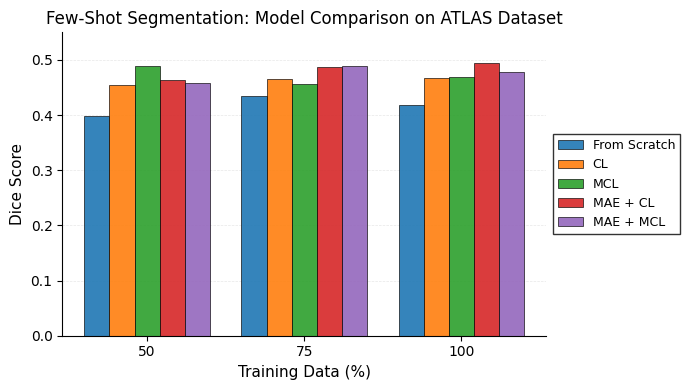

In [8]:
# Figure 2: Grouped Bar Chart - IEEE Publication Style
fig, ax = plt.subplots(figsize=(7, 4))

# Get unique percentages and use model_order for models
percentages = sorted(df['Data %'].unique())
models = [m for m in model_order if m in data.keys()]

x = np.arange(len(percentages))
width = 0.16  # Width of bars

# Plot bars for each model with consistent colors in the desired order
for i, model in enumerate(models):
    df_model = df[df['Model'] == model]
    values = [df_model[df_model['Data %'] == pct]['Dice Score'].values[0] 
              if len(df_model[df_model['Data %'] == pct]) > 0 else 0 
              for pct in percentages]
    
    offset = width * (i - 2)  # Center the bars
    bars = ax.bar(x + offset, values, width, label=model, 
                  color=model_colors[model], alpha=0.9, 
                  edgecolor='black', linewidth=0.5)

ax.set_xlabel('Training Data (%)')
ax.set_ylabel('Dice Score')
ax.set_title('Few-Shot Segmentation: Model Comparison on ATLAS Dataset')

ax.set_xticks(x)
ax.set_xticklabels([f'{int(pct)}' for pct in percentages])

# Legend - placed outside the plot area to avoid overlapping with data
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, 
          edgecolor='black', fancybox=False, shadow=False)

# Grid
ax.yaxis.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

# Clean spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Set y-axis range for better visualization
ax.set_ylim(0, 0.55)

plt.tight_layout()
plt.savefig('atlas_fewshot_barplot.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.savefig('atlas_fewshot_barplot.pdf', bbox_inches='tight', 
            facecolor='white', edgecolor='none')  # PDF for LaTeX
plt.show()

## IEEE Publication-Ready Figures

### Features:
- **Font**: Times New Roman (serif) - IEEE standard
- **Figure size**: 7" × 4" (IEEE double-column width)
- **Resolution**: 300 DPI PNG + vector PDF for LaTeX
- **Colors**: Professional palette that works in grayscale
- **Line styles**: Distinct patterns for B&W printing
- **Markers**: Different shapes for each model (○, □, △, ◇, ▽)
- **Grid**: Subtle dashed grid
- **Borders**: Clean, minimal spines

### Output Files:
1. `atlas_fewshot_lineplot.png` / `.pdf` - Line plot showing data efficiency
2. `atlas_fewshot_barplot.png` / `.pdf` - Grouped bar chart comparison

### Next Steps:
1. **Add 25% and 50% results** to the `data` dictionary above
2. **Re-run all cells** to generate final figures
3. **Use PDF files** for LaTeX documents (vector graphics)
4. **Use PNG files** for Word/PowerPoint

### Key Insights:
- Combined Regular performs best at 100% (0.4936)
- Combined Modality shows robustness at 75% (0.4893)
- From Scratch baseline: 0.4188
- Pretraining provides ~8-18% improvement